<a href="https://colab.research.google.com/github/DrueStaples/Temperature_Transformer_TF2.0/blob/master/Temperature_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome! Here, we will train a model to convert Celsius to Fahrenheit! Enjoy!

1.) Import the packages

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#unicode_literals makes our code cross-python compatible
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
#Sets the threshold for what messages will be logged.

import numpy as np

2.) Set up the training data. We are using 7 features and labels. The formula we will be using for the conversion is  **Fahrenheit = Celsius * 1.8 + 32**

In [0]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,v in enumerate(celsius):
  print(f'{v} degrees Celsius = {fahrenheit[i]} degrees Fahrenheit')

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


3.) Construct our model

In [0]:
Layer_1 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([Layer_1])

#model = tf.keras.Sequential([
 #   tf.keras.layers.Dense(units=1, input_shape=[1])
#])

4.) Compile the model with an optimizer and loss function

In [0]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(0.1)) #optimizers usually range from .001(default) and 0.1

5.) Train the model

In [0]:
training = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('We have finished!')

We have finished!


Let's display a plot graph of the training!

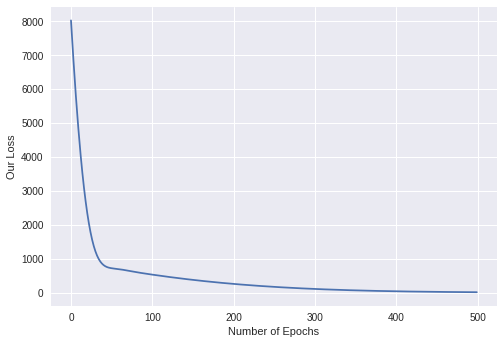

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Number of Epochs')
plt.ylabel('Our Loss')
plt.plot(training.history['loss'])

6.) Test our model to see how well it generalizes 

In [0]:
print(model.predict([269.0])) 
#269 degrees celsius should equate to 516.2 degrees fahrenheit

[[520.36273]]


As you can see, we were pretty close!

Now, let's print out the weights of our variables!

In [0]:
print(f'Layer variables: {Layer_1.get_weights()}')

Layer variables: [array([[1.8289071]], dtype=float32), array([28.3867], dtype=float32)]


To recall, our equation is **F = C * 1.8 +32**, therefore our weights should be 1.8 and 32. Notice above, our floats were pretty close with weighted values of 1.8 and 28. 

Now let's make our NN more dense with 3 layers!

In [0]:
#create layers
#start model
#compile model
#fit model
#predictions 
#print weights for each layer

layer_0 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer_1 = tf.keras.layers.Dense(units=4)
layer_2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([layer_0, layer_1, layer_2])
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print(model.predict([269.0]))
print(layer_0.get_weights())
print(layer_1.get_weights())
print(layer_2.get_weights())

[[515.6007]]
[array([[-0.26643568,  0.72359765,  0.49160826, -0.30326268]],
      dtype=float32), array([-3.5208144 ,  3.5314832 , -0.33162206,  2.4510448 ], dtype=float32)]
[array([[-1.0937077 ,  0.44414964, -0.43559876,  1.1919323 ],
       [ 1.4309438 , -0.80799717, -0.24728252,  0.96417797],
       [-0.4137851 ,  0.16779871,  0.01955398, -0.3085369 ],
       [ 0.7138708 , -0.47445685, -0.9245303 ,  0.53404534]],
      dtype=float32), array([ 3.4105687, -2.550465 , -0.9116453,  1.3983021], dtype=float32)]
[array([[ 1.6424125 ],
       [-0.6201824 ],
       [ 0.00786788],
       [ 0.16595633]], dtype=float32), array([3.2356231], dtype=float32)]


#Our generalization output is 515.6 which is closer than before (actual output is 516.2)!
#Notice our weights in the arrays aren't near 1.8 or 32. This is because we added more complex layers!
